In [1]:
 #Importing the Required Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2]:
df=pd.read_csv('framingham.csv')

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


Finding missing value

In [4]:
 df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.isnull().sum().sum() 

645

In [6]:
#%percent null values

df.isnull().sum() / df.shape[0] * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

C:\Users\manis\AppData\Local\Temp\ipykernel_10064\4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

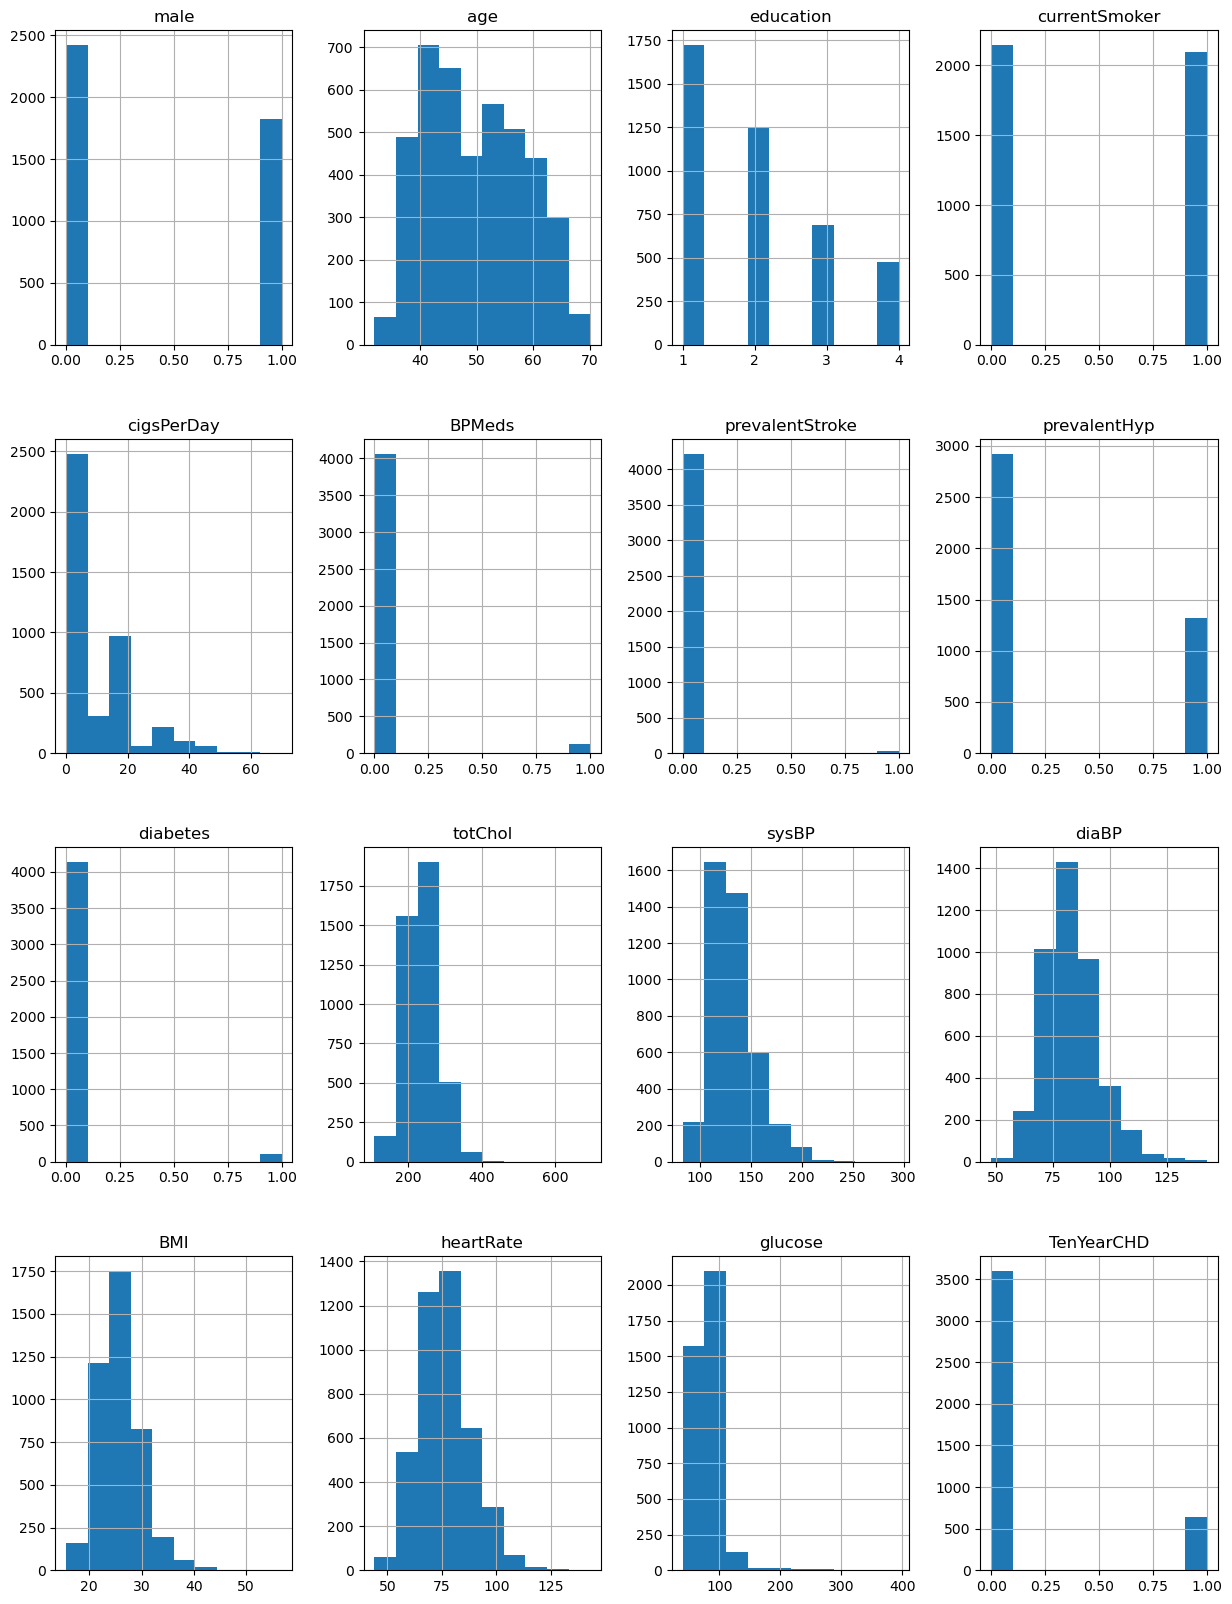

In [7]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [8]:
df['education'].fillna(df['education'].max(),inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].max(),inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)
df['glucose'].fillna(df['glucose'].median(),inplace=True)

In [9]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

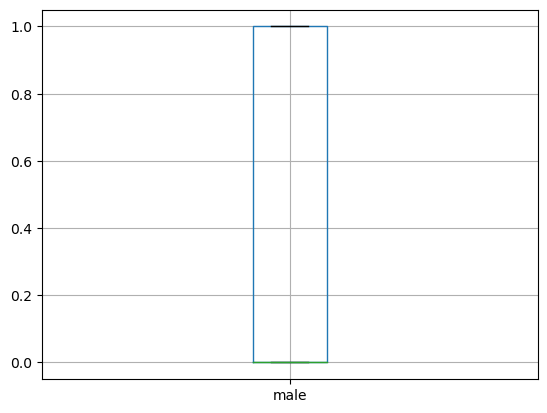

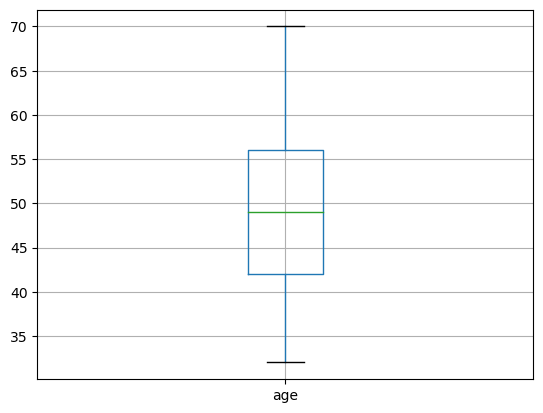

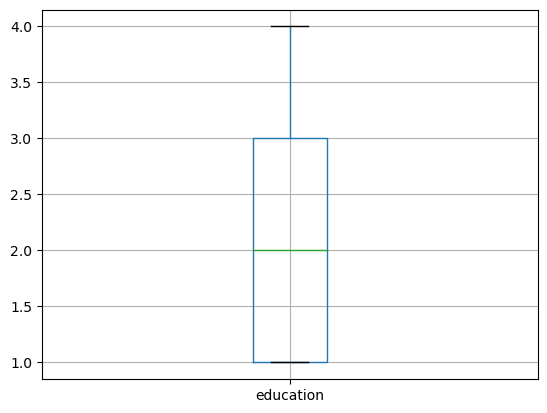

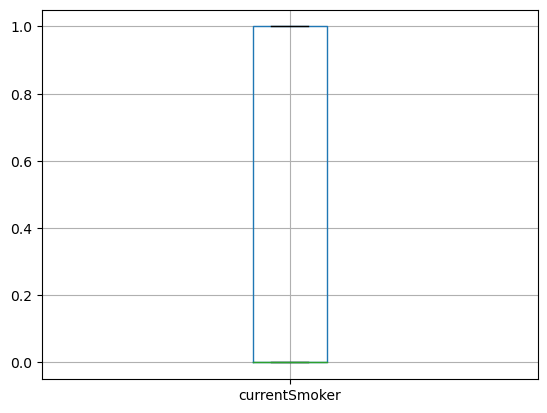

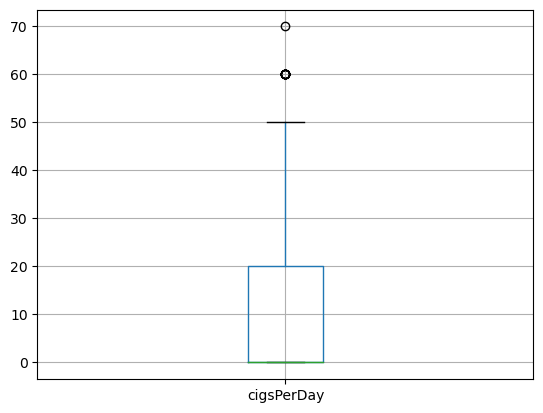

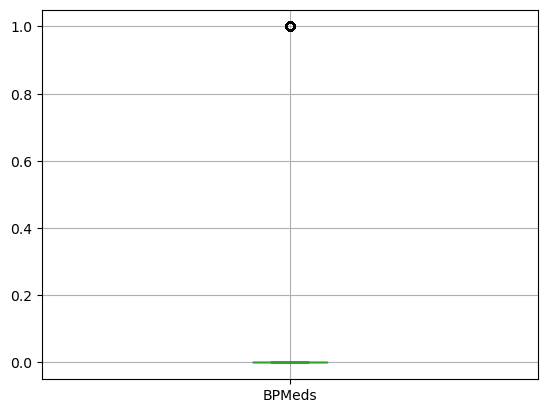

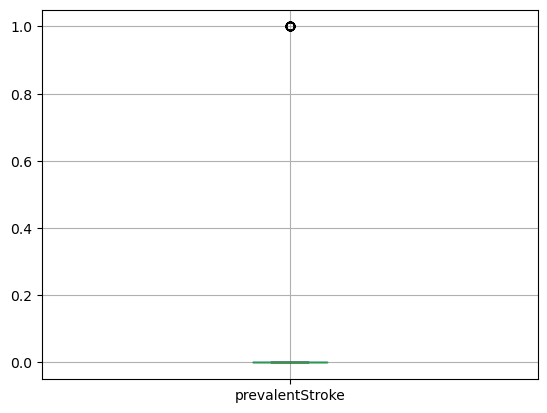

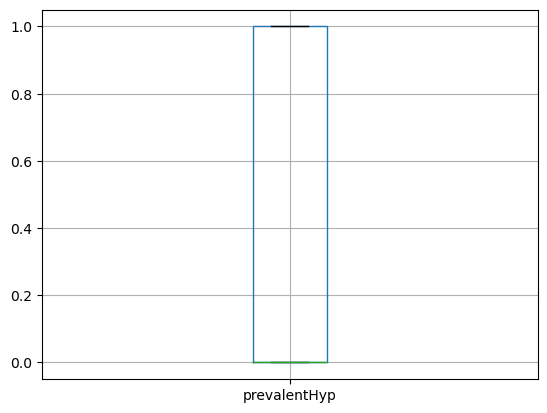

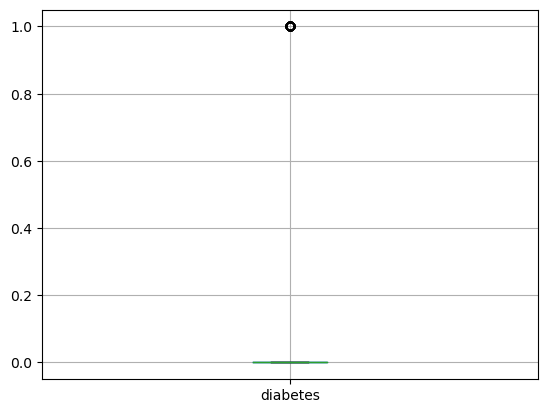

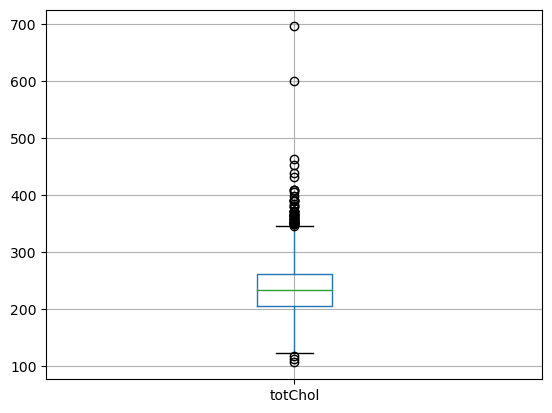

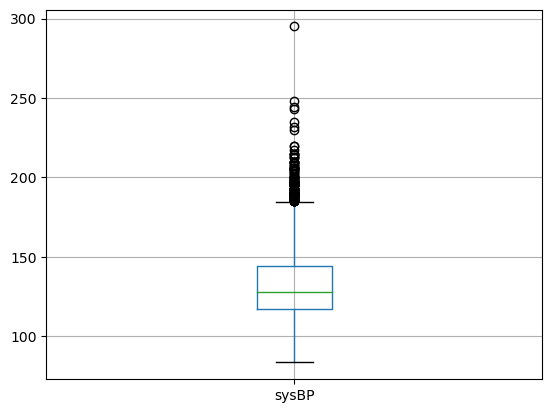

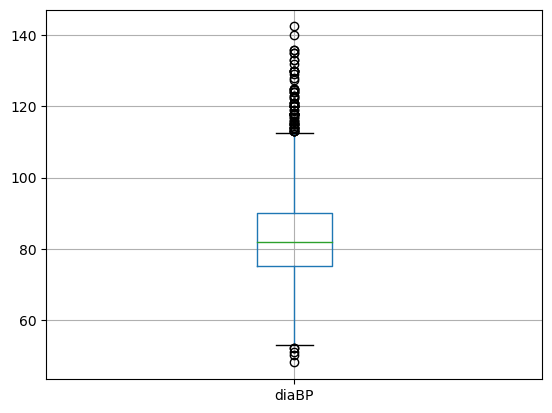

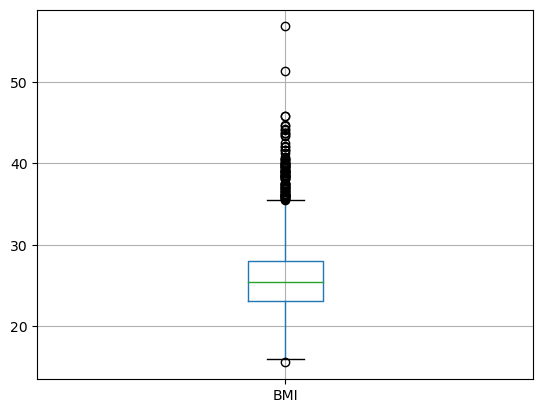

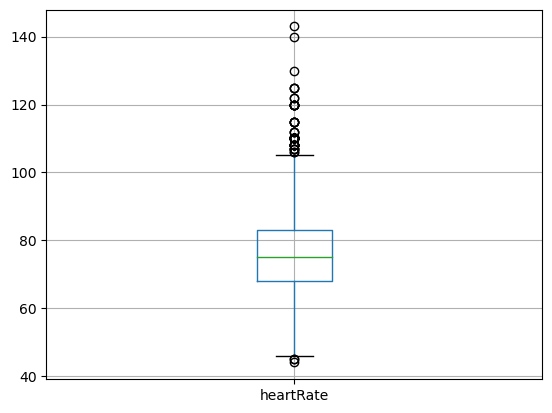

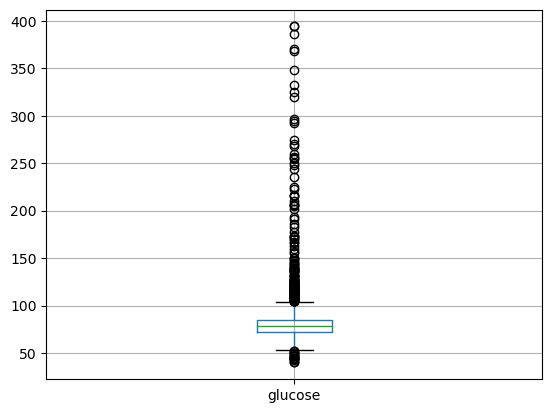

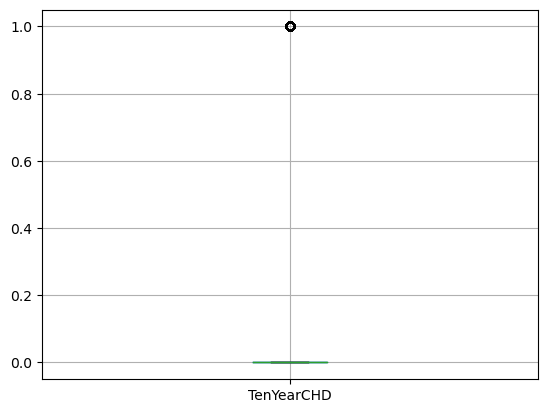

In [10]:
import matplotlib.pyplot as plt

for column in df:
    plt.figure()
    df.boxplot([column])

In [11]:
import seaborn as sns

<Axes: >

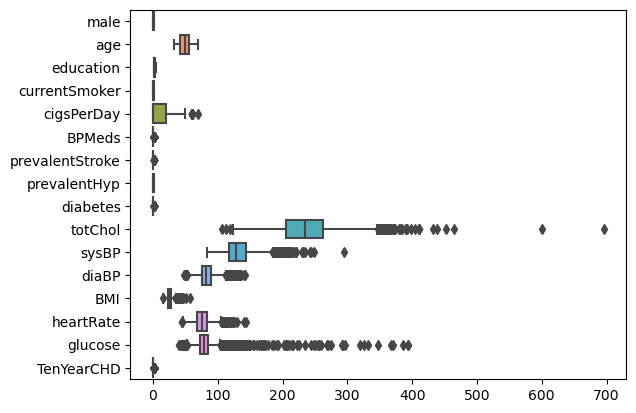

In [12]:
 sns.boxplot(data=df[df.columns], orient='h')

Conclusion of Boxplot :

Outliers found in features named ['totChol', 'sysBP', 'BMI','heartRate', 'glucose']

In [13]:
q1 = df['sysBP'].quantile(.25)
q3 = df['sysBP'].quantile(.75)
IQR = q3 - q1
df['sysBP'] = np.clip(df['sysBP'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

In [14]:
q1 = df['totChol'].quantile(.25)
q3 = df['totChol'].quantile(.75)
IQR = q3 - q1
df['totChol'] = np.clip(df['totChol'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

In [15]:
q1 = df['BMI'].quantile(.25)
q3 = df['BMI'].quantile(.75)
IQR = q3 - q1
df['BMI'] = np.clip(df['BMI'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

In [16]:
q1 = df['heartRate'].quantile(.25)
q3 = df['heartRate'].quantile(.75)
IQR = q3 - q1
df['heartRate'] = np.clip(df['heartRate'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

In [17]:
q1 = df['glucose'].quantile(.25)
q3 = df['glucose'].quantile(.75)
IQR = q3 - q1
df['glucose'] = np.clip(df['glucose'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

In [18]:
q1 = df['diaBP'].quantile(.25)
q3 = df['diaBP'].quantile(.75)
IQR = q3 - q1
df['diaBP'] = np.clip(df['diaBP'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

In [19]:
df['cigsPerDay'] = np.clip(df['cigsPerDay'], 0,50 )

<Axes: >

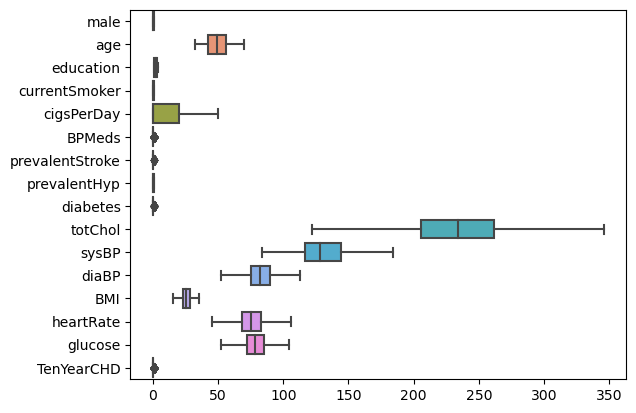

In [20]:
 sns.boxplot(data=df[df.columns], orient='h')

EDA

In [21]:
df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

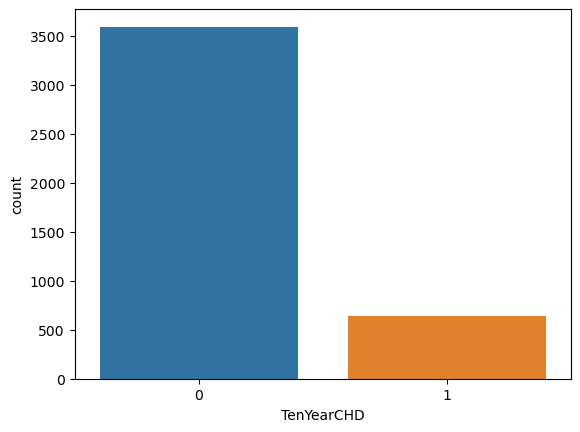

In [22]:
sns.countplot(x='TenYearCHD',data=df)

In [23]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,2.029481,0.494104,8.913679,0.041745,0.005896,0.310613,0.025708,236.201881,131.915684,82.743042,25.715894,75.750915,79.450472,0.151887
std,0.495027,8.572942,1.054911,0.500024,11.783496,0.200030,0.076569,0.462799,0.158280,42.298545,20.642860,11.404757,3.787924,11.622269,11.453158,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,83.500000,52.500000,15.645000,45.500000,52.500000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,346.000000,184.500000,112.500000,35.465000,105.500000,104.500000,1.000000


<Axes: >

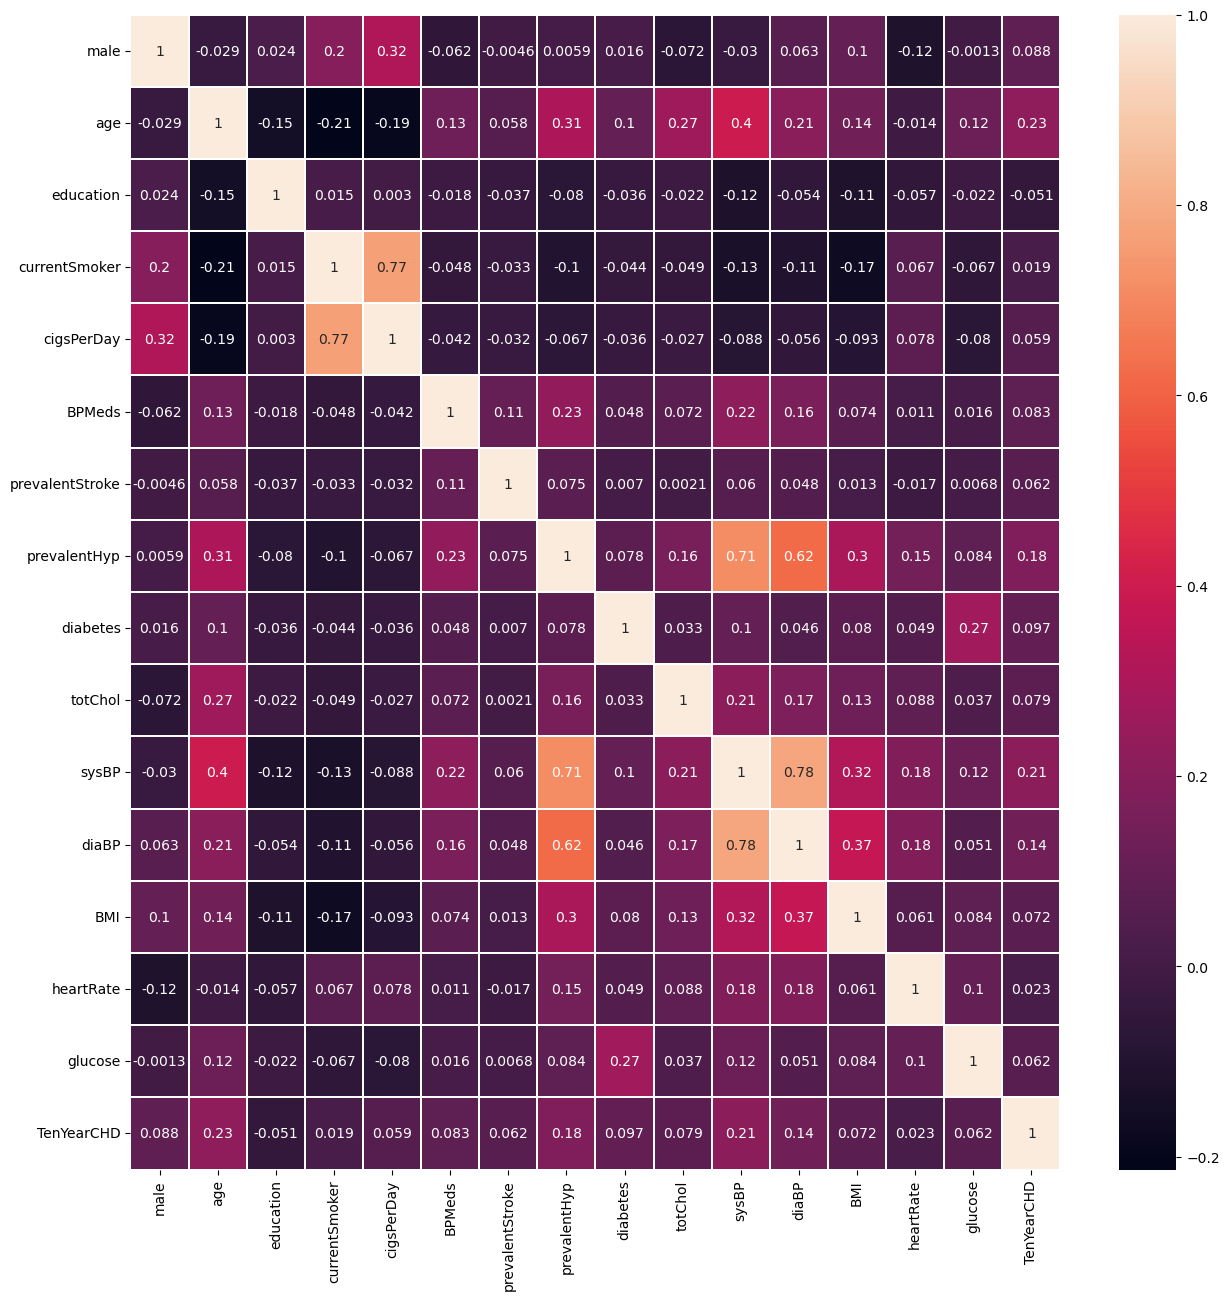

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)

From above heat map current smoker and cigsprday are sytrongly correlated.

so dropping currentsmoker,education

In [25]:
features_to_drop = ['currentSmoker','education']

df.drop(features_to_drop, axis=1, inplace=True)
 

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


from sklearn.model_selection import train_test_split
# X is the feature matrix, y is the target variabl


X = df.drop(['TenYearCHD'], axis=1)

y=df['TenYearCHD']



In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score')) 

              Specs       Score
8             sysBP  601.704184
1               age  319.266019
2        cigsPerDay  232.355126
7           totChol  201.951301
9             diaBP  131.465312
5      prevalentHyp   92.048736
6          diabetes   39.144944
3            BPMeds   27.666559
12          glucose   27.298443
0              male   18.899930
4   prevalentStroke   16.109887


In [28]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=0)  

x_tr=scaler.fit_transform(x_train)
x_tst=scaler.transform(x_test)
x_train


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1940,0,52,20.0,0.0,0,0,0,236.699523,110.0,70.0,22.520,75.0,78.0
1670,1,37,20.0,0.0,0,0,0,272.000000,114.5,80.0,27.600,63.0,57.0
264,1,57,0.0,0.0,0,1,0,176.000000,134.0,97.0,35.465,68.0,94.0
385,1,39,0.0,0.0,0,0,0,235.000000,120.0,80.0,27.230,62.0,87.0
2570,1,47,0.0,0.0,0,0,1,199.000000,161.0,102.0,29.170,58.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0,44,0.0,0.0,0,1,0,187.000000,122.0,83.0,30.400,85.0,75.0
3264,0,51,2.0,0.0,0,0,0,261.000000,127.0,81.0,20.240,75.0,96.0
1653,1,39,20.0,0.0,0,0,0,148.000000,101.0,62.0,24.470,70.0,81.0
2607,0,57,0.0,0.0,0,1,0,346.000000,133.0,77.0,24.270,75.0,81.0


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf = LogisticRegression()
clf.fit(x_train, y_train)




C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print("Testing set performance :")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Testing set performance :
Accuracy: 0.8459119496855346


In [31]:
x_train_preds = clf.predict(x_train)


In [32]:
print("Training set performance :")
print(accuracy_score(y_train, x_train_preds))

Training set performance :
0.8483827493261455


Its not overfitting or underfitting both accuracy are same.

In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1260
           1       0.03      0.50      0.06        12

    accuracy                           0.85      1272
   macro avg       0.51      0.67      0.49      1272
weighted avg       0.99      0.85      0.91      1272



KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
 
# Predictions and Evaluations
# Let's evaluate our KNN model !
print(classification_report(y_test, pred))
y_pred_knn = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1076
           1       0.24      0.06      0.10       196

    accuracy                           0.83      1272
   macro avg       0.54      0.51      0.50      1272
weighted avg       0.76      0.83      0.78      1272



In [35]:
print("Accuracy:", accuracy)

Accuracy: 0.8254716981132075


Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
  
# performing predictions on the test dataset
y_pred_ran = clf.predict(x_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_ran))
print(classification_report(y_test, y_pred_ran))


ACCURACY OF THE MODEL:  0.8466981132075472
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1076
           1       0.52      0.06      0.11       196

    accuracy                           0.85      1272
   macro avg       0.69      0.53      0.51      1272
weighted avg       0.80      0.85      0.79      1272



In [37]:
# performing predictions on the test dataset
x_pred_ran = clf.predict(x_train)

In [38]:
print("Training set performance :")
print(accuracy_score(y_train, x_pred_ran))

Training set performance :
1.0


Random forest is overfitting

In [39]:
from xgboost import XGBClassifier

In [40]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.20%


In [41]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1076
           1       0.45      0.12      0.19       196

    accuracy                           0.84      1272
   macro avg       0.66      0.55      0.55      1272
weighted avg       0.80      0.84      0.80      1272



Above  all of them logistic regression  is best model.